In [1]:
import pandas as pd
import seaborn as sns   
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from math import pi
import networkx as nx

In [2]:
file1 = "C:\\Users\\Usuario\\Documents\\CODIGO\\EVENT_SALUD\\DATA_salud_csv.csv"
data_salud = pd.read_csv(file1, sep=";")

#Eliminando datos no deseados
data_salud = data_salud[data_salud["EVENTOS"] != "Numero de Controles Prenatales realizados."]

print(data_salud.isnull().sum())

# Diccionario de regiones clasificadas por zonas
zonas_geograficas = {
    "Costa": [
        "TUMBES", "PIURA", "LAMBAYEQUE", "LA LIBERTAD", 
        "ANCASH", "LIMA", "CALLAO", "ICA", "AREQUIPA", "MOQUEGUA", "TACNA"
    ],
    "Sierra": [
        "CAJAMARCA", "AMAZONAS", "HUANUCO", "PASCO", "JUNIN", 
        "HUANCAVELICA", "APURIMAC", "CUSCO", "AYACUCHO", "PUNO", "AREQUIPA"
    ],
    "Selva": [
        "AMAZONAS", "LORETO", "UCAYALI", "SAN MARTIN", 
        "MADRE DE DIOS", "HUÁNUCO", "CUSCO"
    ]
}

# Agregar la columna 'Zona' al dataset según el departamento
def asignar_zona(departamento):
    for zona, departamentos in zonas_geograficas.items():
        if departamento.upper() in departamentos:
            return zona
    return "Otros"

# Aplicar la función al dataset de data_salud
data_salud["Zona"] = data_salud["DEPARTAMENTO"].apply(asignar_zona)


data_salud


MES             0
UBIGEO          0
DEPARTAMENTO    0
PROVINCIA       0
DISTRITO        0
SECTOR          0
CATEGORIA       0
CO_IPRESS       0
RAZON_SOC       0
EVENTOS         0
CANT_EVENTOS    0
dtype: int64


,MES,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SECTOR,CATEGORIA,CO_IPRESS,RAZON_SOC,EVENTOS,CANT_EVENTOS,Zona
0,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,11401,CLINICA SAN JUDAS TADEO,Nacidos vivos con bajo peso al nacer (< 2500 grs),2,Costa
1,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,11401,CLINICA SAN JUDAS TADEO,Nacidos vivos con edad gestacional menor a 37 ...,3,Costa
2,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,11401,CLINICA SAN JUDAS TADEO,Numero de Casos Nuevos de Infeccion Intrahosp...,1,Costa
3,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,11401,CLINICA SAN JUDAS TADEO,Fallecimientos en todos los servicios.,1,Costa
4,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,11401,CLINICA SAN JUDAS TADEO,Nacidos vivos con bajo peso al nacer (< 2500 grs),4,Costa
...,...,...,...,...,...,...,...,...,...,...,...,...
164405,11,160108,LORETO,MAYNAS,PUNCHANA,GOBIERNO REGIONAL,III-1,3,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",Numero de muertes neonatales (menos de 28 dias...,8,Selva
164406,11,160108,LORETO,MAYNAS,PUNCHANA,GOBIERNO REGIONAL,III-1,3,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",Nacidos vivos con bajo peso al nacer (< 2500 grs),36,Selva
164407,11,160108,LORETO,MAYNAS,PUNCHANA,GOBIERNO REGIONAL,III-1,3,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",Nacidos vivos con bajo peso al nacer (< 2500 grs),28,Selva
164408,11,160108,LORETO,MAYNAS,PUNCHANA,GOBIERNO REGIONAL,III-1,3,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",Nacidos vivos con edad gestacional menor a 37 ...,21,Selva


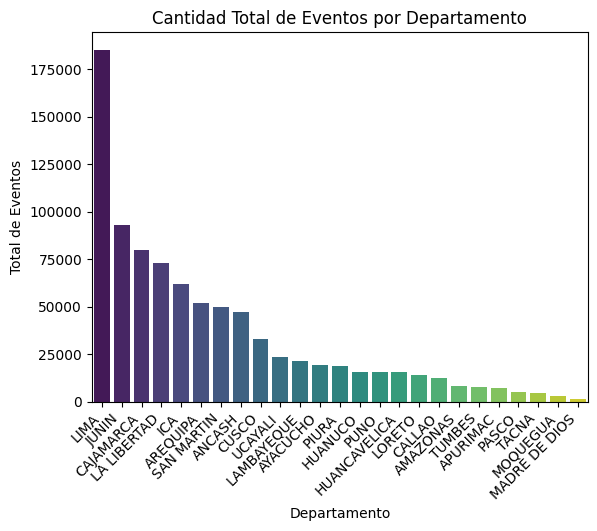

np.int64(869119)

In [3]:
# Agrupar por departamento y calcular la suma de eventos
df_departamentos = data_salud.groupby("DEPARTAMENTO")["CANT_EVENTOS"].sum().reset_index()

# Ordenar el DataFrame de mayor a menor en base a "CANT_EVENTOS"
df_departamentos = df_departamentos.sort_values(by="CANT_EVENTOS", ascending=False)

# Gráfico
sns.barplot(
    x="DEPARTAMENTO",
    y="CANT_EVENTOS",
    data=df_departamentos,
    palette="viridis",
    hue="DEPARTAMENTO",  # Asignamos hue a la misma variable de x
    dodge=False  # Evita separar las barras en grupos
)
plt.legend([], [], frameon=False)  # Desactiva la leyenda
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad Total de Eventos por Departamento")
plt.ylabel("Total de Eventos")
plt.xlabel("Departamento")
plt.show()

#Numero total de eventos en el año
numero_total = data_salud["CANT_EVENTOS"].sum()
numero_total
 

**¿Cuales son los eventos medicos que sucedieron mas en este año 2024?**

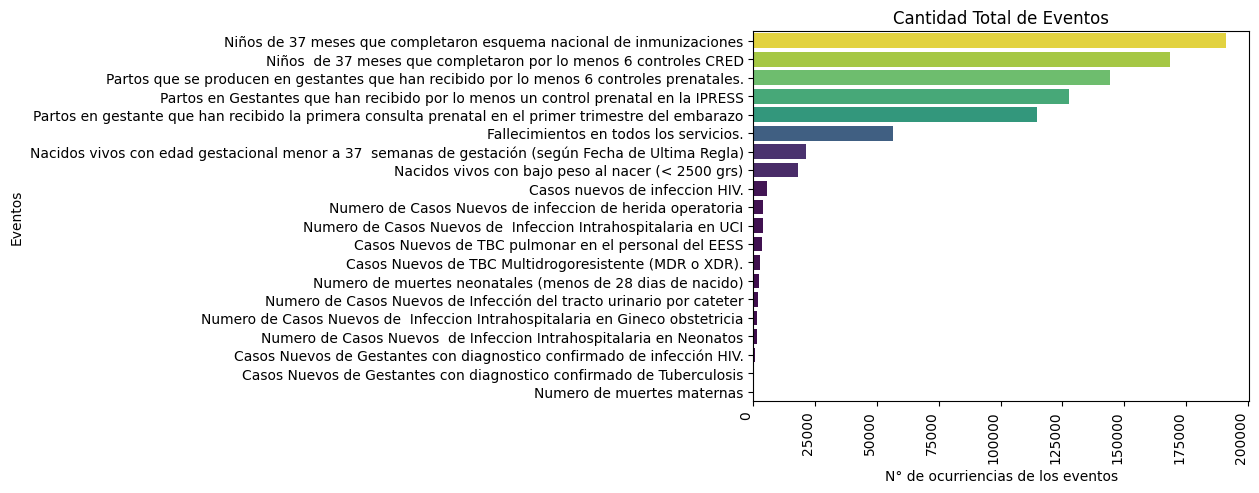

In [4]:
# Filtrar el DataFrame para excluir el evento "Numero de Controles Prenatales realizados" 
data_filtrada = data_salud.loc[data_salud["EVENTOS"] != "Numero de Controles Prenatales realizados"]

# Agrupar por eventos y calcular la suma de eventos
df_departamentos = data_filtrada.groupby("EVENTOS")["CANT_EVENTOS"].sum().reset_index()

# Ordenar el DataFrame de mayor a menor en base a "CANT_EVENTOS"
df_departamentos = df_departamentos.sort_values(by="CANT_EVENTOS", ascending=False)

# Gráfico
sns.barplot(
    x="CANT_EVENTOS",
    y="EVENTOS",
    data=df_departamentos,
    palette="viridis",
    hue="CANT_EVENTOS",  # Asignamos hue a la misma variable de x
    dodge=False  # Evita separar las barras en grupos
)
plt.legend([], [], frameon=False)  # Desactiva la leyenda
plt.xticks(rotation=90, ha='right')
plt.title("Cantidad Total de Eventos")
plt.ylabel("Eventos")
plt.xlabel("N° de ocurriencias de los eventos")
plt.show()

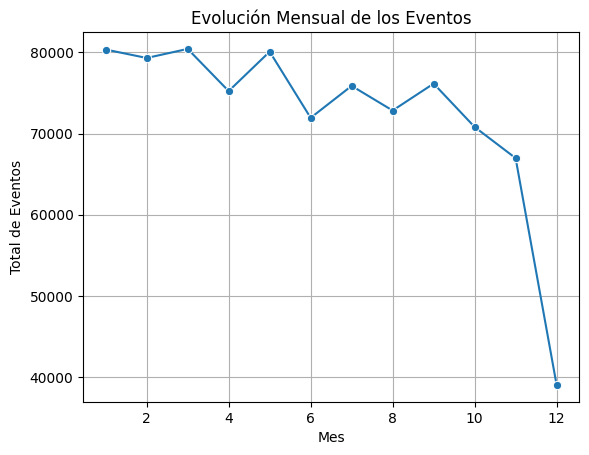

In [5]:
df_mensual = data_salud.groupby("MES")["CANT_EVENTOS"].sum().reset_index()
sns.lineplot(x="MES", y="CANT_EVENTOS", data=df_mensual, marker="o")
plt.title("Evolución Mensual de los Eventos")
plt.xlabel("Mes")
plt.ylabel("Total de Eventos")
plt.grid()
plt.show()


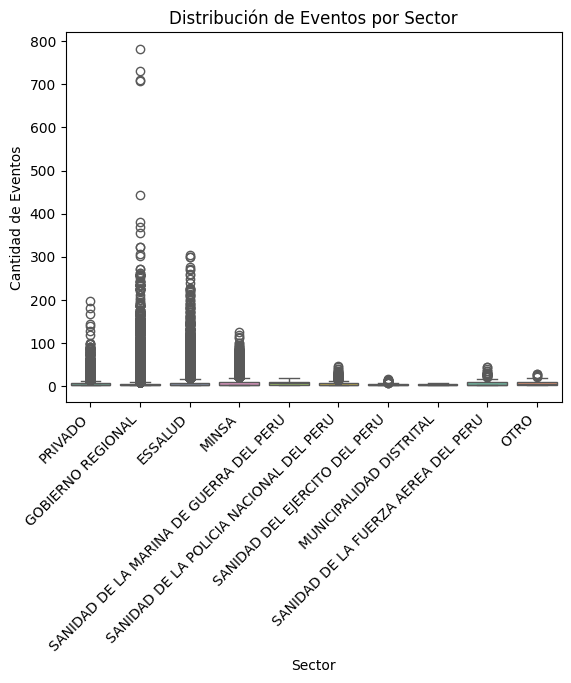

In [6]:
sns.boxplot(x="SECTOR", y="CANT_EVENTOS", data=data_salud, palette="Set2",hue="SECTOR")

plt.title("Distribución de Eventos por Sector")
plt.ylabel("Cantidad de Eventos")
plt.xlabel("Sector")
plt.xticks(rotation=45, ha='right')
plt.show()


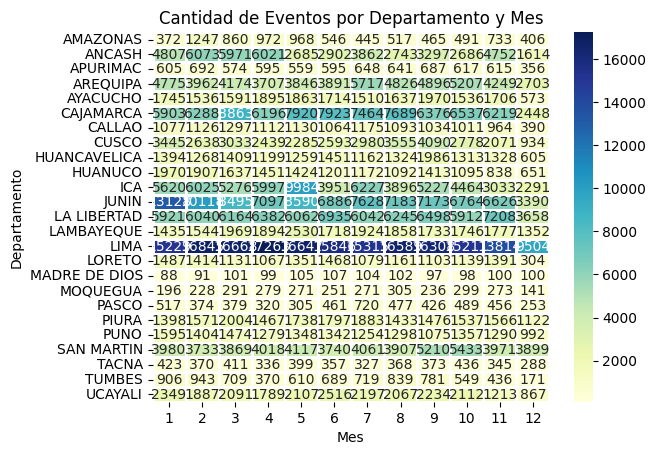

In [7]:
heatmap_data = data_salud.pivot_table(index="DEPARTAMENTO", columns="MES", values="CANT_EVENTOS", aggfunc="sum")
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.9)
plt.title("Cantidad de Eventos por Departamento y Mes")
plt.ylabel("Departamento")
plt.xlabel("Mes")
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_11740\1693841342.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


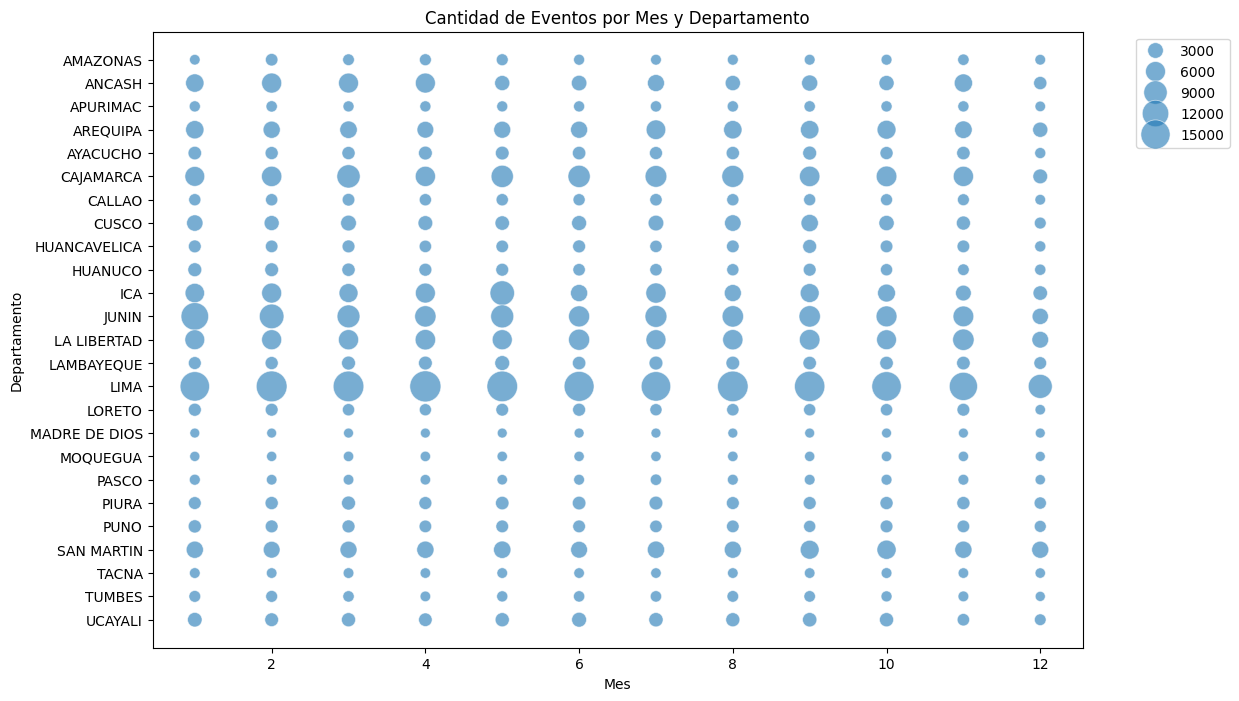

In [8]:
bubble_data = data_salud.groupby(["MES", "DEPARTAMENTO"]).agg({"CANT_EVENTOS": "sum"}).reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="MES", y="DEPARTAMENTO", size="CANT_EVENTOS", data=bubble_data, sizes=(50, 500), alpha=0.6, palette="cool"
)
plt.title("Cantidad de Eventos por Mes y Departamento")
plt.xlabel("Mes")
plt.ylabel("Departamento")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


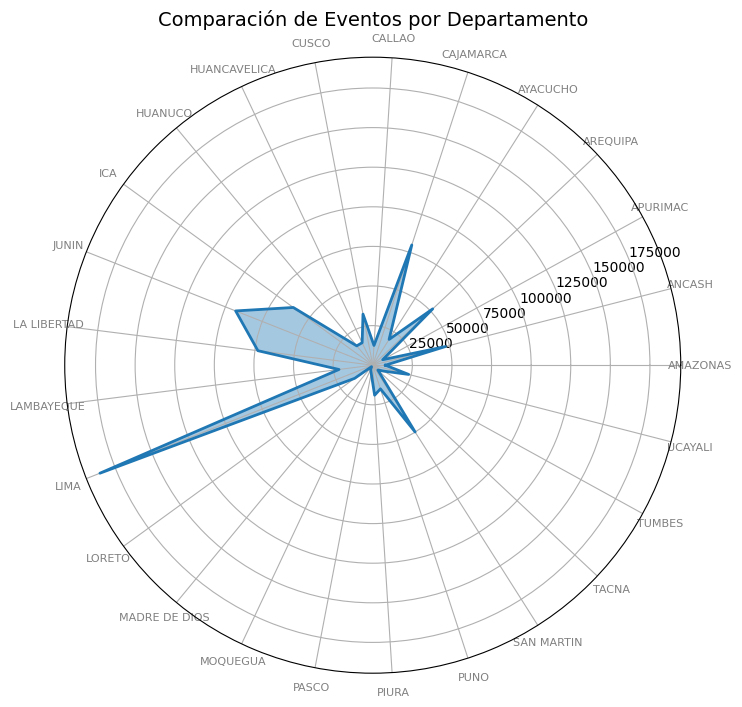

In [9]:


radar_data = data_salud.groupby("DEPARTAMENTO")["CANT_EVENTOS"].sum().reset_index()
categories = radar_data["DEPARTAMENTO"].tolist()
values = radar_data["CANT_EVENTOS"].tolist()
values += values[:1]  # Cierra el gráfico

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color="grey", size=8)
ax.plot(angles, values, linewidth=2, linestyle="solid")
ax.fill(angles, values, alpha=0.4)
plt.title("Comparación de Eventos por Departamento", size=14)
plt.show()


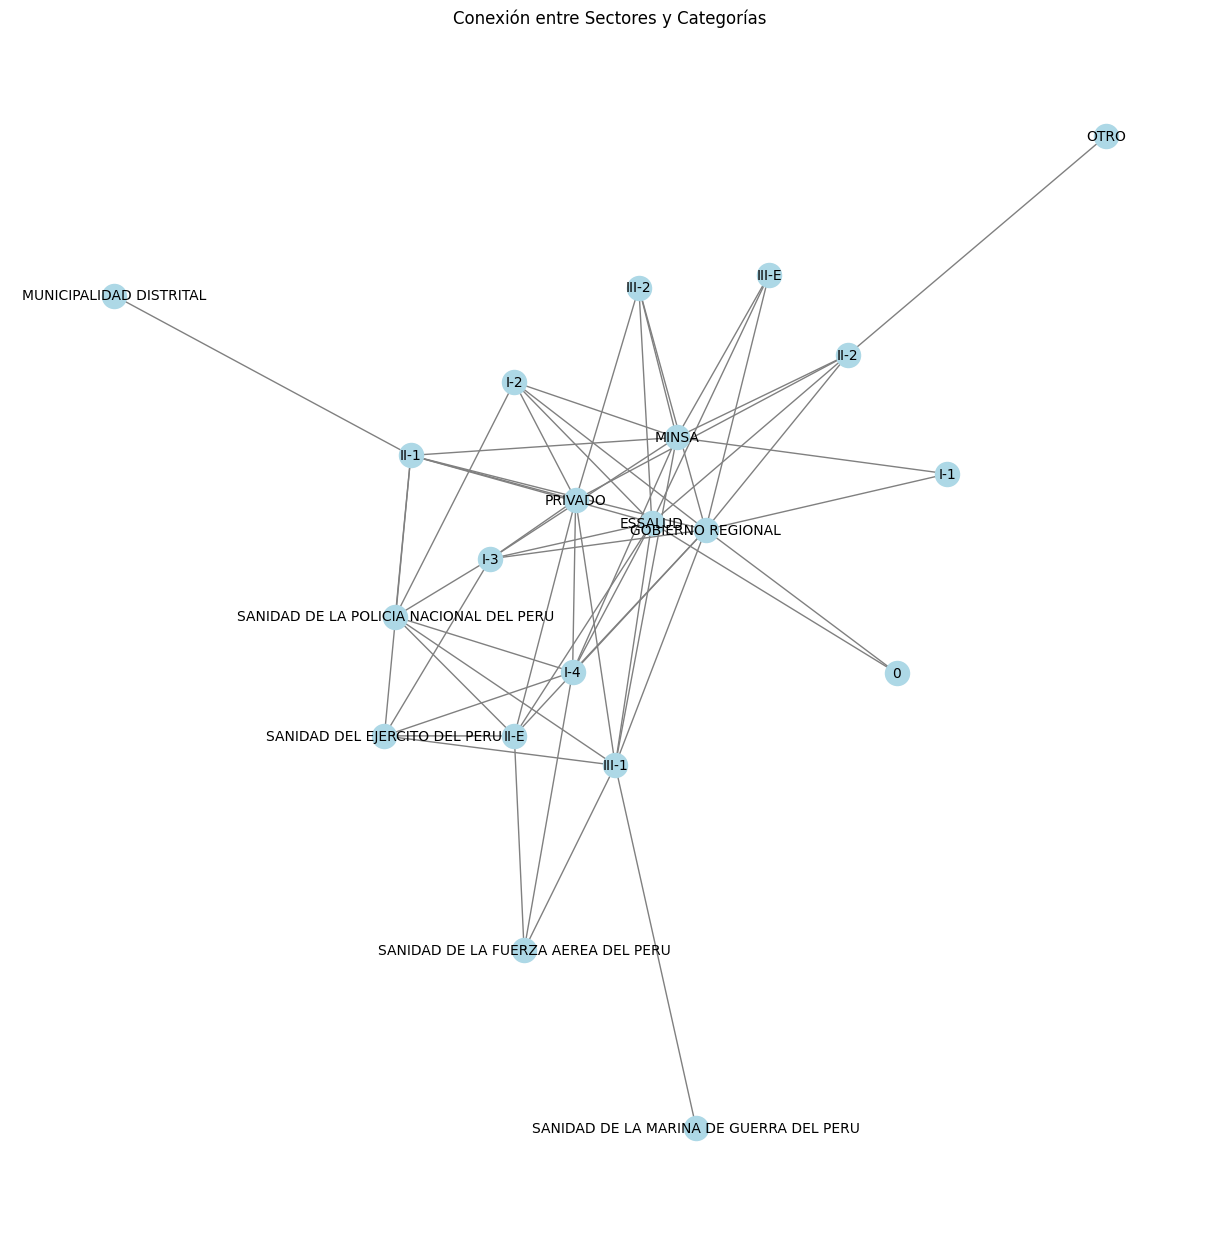

In [10]:
G = nx.from_pandas_edgelist(data_salud, source="SECTOR", target="CATEGORIA", edge_attr="CANT_EVENTOS")
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Conexión entre Sectores y Categorías")
plt.show()


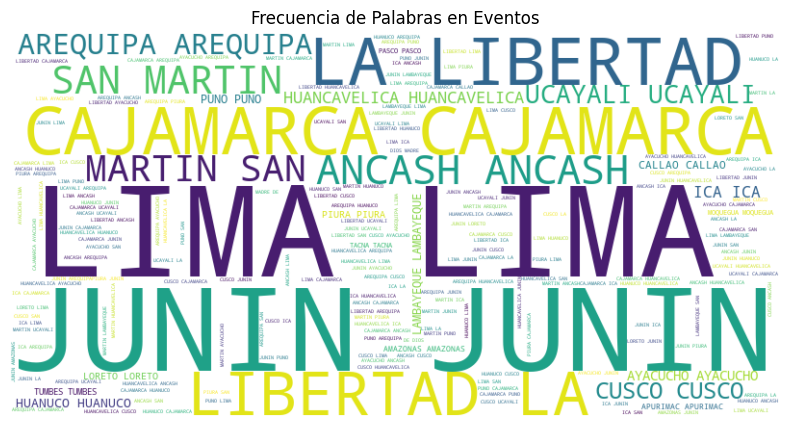

In [11]:
from wordcloud import WordCloud

text = " ".join(data_salud["DEPARTAMENTO"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Palabras en Eventos")
plt.show()

In [12]:
# Filtrar los datos para eventos específicos: muertes maternas y neonatales
muertes_data = data_salud[
    (data_salud["EVENTOS"] == "Numero de muertes maternas") |
    (data_salud["EVENTOS"] == "Numero de muertes neonatales (menos de 28 dias de nacido)")
]

# Contar el número de eventos por tipo
conteo_eventos = muertes_data["EVENTOS"].value_counts()
print(conteo_eventos)


# Total de muertes por departamento
muertes_por_departamento = muertes_data.groupby("DEPARTAMENTO")["CANT_EVENTOS"].sum().reset_index()
print(muertes_por_departamento)



EVENTOS
Numero de muertes neonatales (menos de 28 dias de nacido)    842
Numero de muertes maternas                                    94
Name: count, dtype: int64
     DEPARTAMENTO  CANT_EVENTOS
0        AMAZONAS            40
1          ANCASH            71
2        APURIMAC            20
3        AREQUIPA            75
4        AYACUCHO             5
5       CAJAMARCA            68
6          CALLAO            73
7           CUSCO           129
8    HUANCAVELICA            10
9         HUANUCO           444
10            ICA            48
11          JUNIN            86
12    LA LIBERTAD           132
13     LAMBAYEQUE            60
14           LIMA           549
15         LORETO            84
16  MADRE DE DIOS           111
17       MOQUEGUA             3
18          PASCO            10
19          PIURA             9
20           PUNO            22
21     SAN MARTIN            76
22          TACNA             9
23         TUMBES            22
24        UCAYALI            74


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11740\3138362288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=muertes_por_departamento, x="CANT_EVENTOS", y="DEPARTAMENTO", palette="viridis")


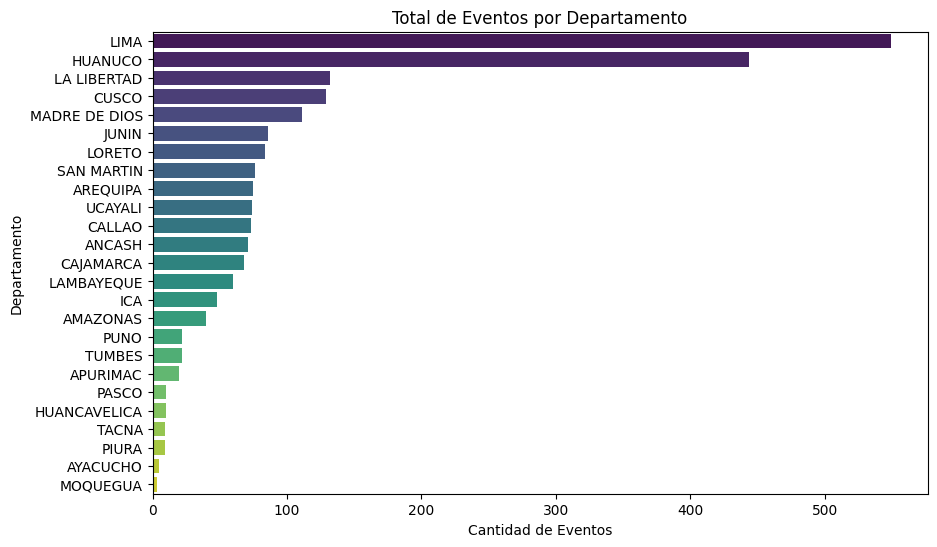

In [13]:
# Ordenar los datos de mayor a menor por cantidad de eventos
muertes_por_departamento = muertes_por_departamento.sort_values(by="CANT_EVENTOS", ascending=False)
# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=muertes_por_departamento, x="CANT_EVENTOS", y="DEPARTAMENTO", palette="viridis")
plt.title("Total de Eventos por Departamento")
plt.xlabel("Cantidad de Eventos")
plt.ylabel("Departamento")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11740\3021977086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


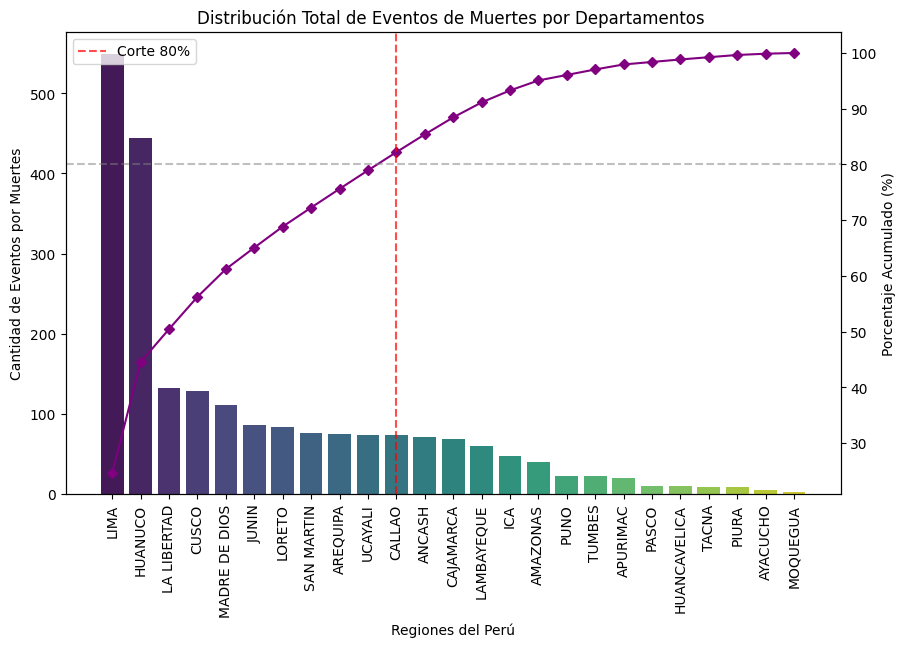

In [28]:


# Gráfico de Pareto
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(
    x=muertes_por_departamento["DEPARTAMENTO"],  # Columna con los nombres de los departamentos
    y=muertes_por_departamento["CANT_EVENTOS"],  # Columna con los valores a graficar
    palette="viridis",
    ax=ax
)
ax.set_title("Distribución Total de Eventos de Muertes por Departamentos ")
ax.set_xlabel("Regiones del Perú")
ax.set_ylabel("Cantidad de Eventos por Muertes")

# Rotación de etiquetas en el eje X
plt.xticks(rotation=90, ha='center')  # Centrar etiquetas verticales

# Gráfico de línea para porcentaje acumulado
ax2 = ax.twinx()
accum_percentage = muertes_por_departamento["CANT_EVENTOS"].cumsum() / muertes_por_departamento["CANT_EVENTOS"].sum() * 100
ax2.plot(
    muertes_por_departamento["DEPARTAMENTO"],  # Misma columna para el eje X
    accum_percentage, 
    color="purple", 
    marker="D", 
    markersize=5, 
    linestyle="-"
)
ax2.axhline(80, color="gray", linestyle="--", alpha=0.5)
ax2.set_ylabel("Porcentaje Acumulado (%)")

# Determinar el índice donde el porcentaje acumulado cruza el 80%
cross_index = muertes_por_departamento["DEPARTAMENTO"][accum_percentage >= 80].iloc[0]

# Dibujar una línea vertical en el punto donde cruza el 80%
ax2.axvline(x=cross_index, color="red", linestyle="--", alpha=0.7, label="Corte 80%")
ax2.legend()

plt.show()


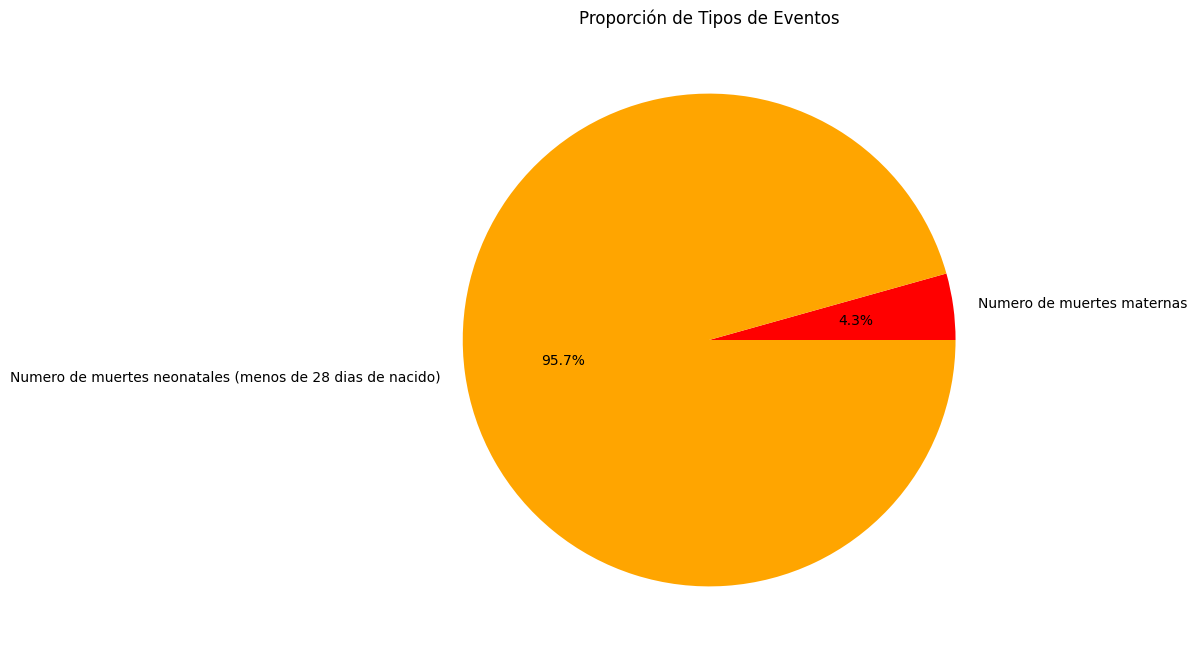

In [15]:
# Comparación de totales entre tipos de eventos
comparacion_eventos = muertes_data.groupby("EVENTOS")["CANT_EVENTOS"].sum().reset_index()

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(comparacion_eventos["CANT_EVENTOS"], labels=comparacion_eventos["EVENTOS"], autopct="%1.1f%%", colors=["red", "orange"])
plt.title("Proporción de Tipos de Eventos")
plt.show()


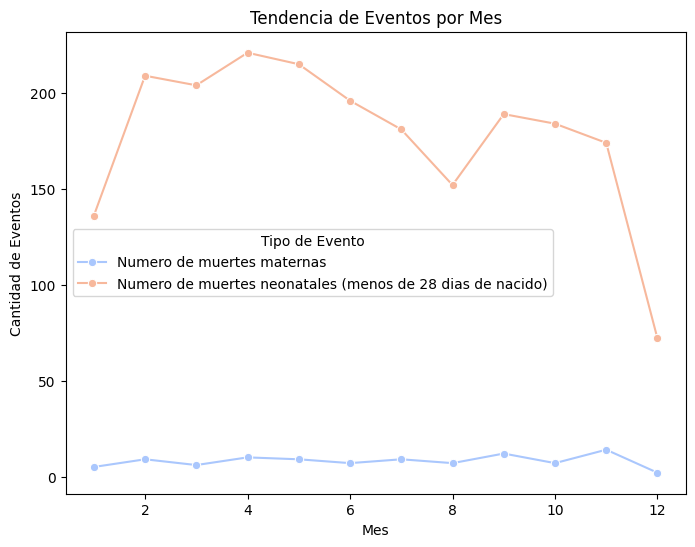

In [26]:
# Tendencia de eventos por mes
tendencia = muertes_data.groupby(["MES", "EVENTOS"])["CANT_EVENTOS"].sum().reset_index()

# Gráfico de línea
plt.figure(figsize=(8, 6))
sns.lineplot(data=tendencia, x="MES", y="CANT_EVENTOS", hue="EVENTOS", marker="o", palette="coolwarm")
plt.title("Tendencia de Eventos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Eventos")
plt.legend(title="Tipo de Evento")
plt.show()


In [17]:
# Departamento con mayor número de eventos por tipo
max_eventos_departamento = muertes_data.groupby(["EVENTOS", "DEPARTAMENTO"])["CANT_EVENTOS"].sum().reset_index()
max_eventos_departamento = max_eventos_departamento.sort_values("CANT_EVENTOS", ascending=False).groupby("EVENTOS").head(1)
print(max_eventos_departamento)


                                              EVENTOS DEPARTAMENTO  \
36  Numero de muertes neonatales (menos de 28 dias...         LIMA   
11                         Numero de muertes maternas        JUNIN   

    CANT_EVENTOS  
36           534  
11            16  


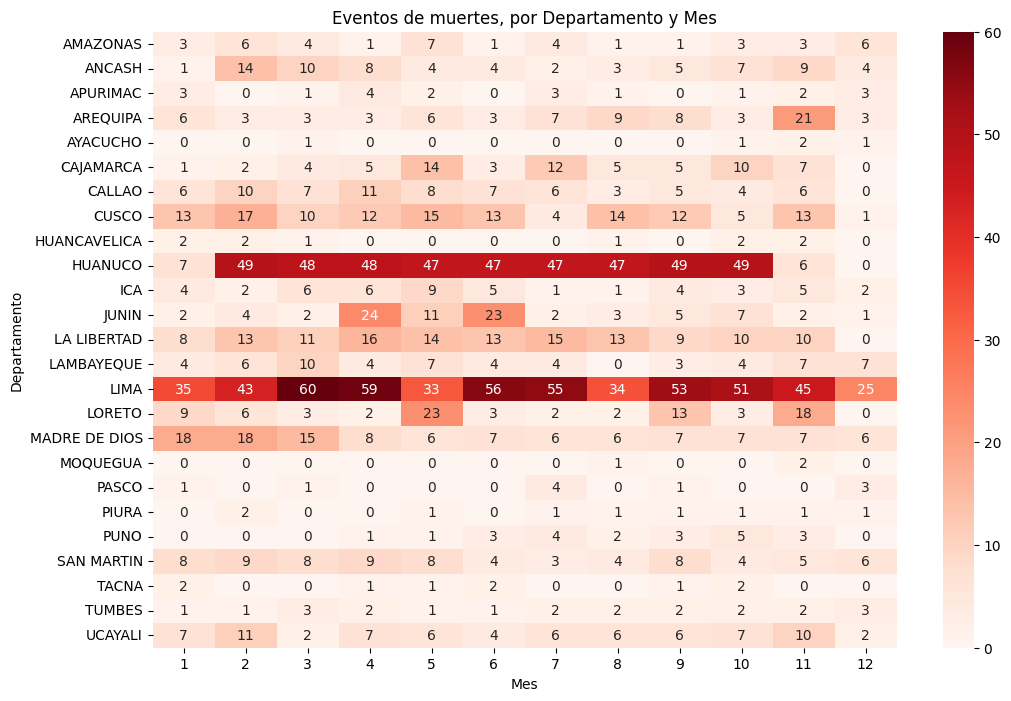

In [18]:
# Crear tabla dinámica
heatmap_data = muertes_data.pivot_table(values="CANT_EVENTOS", index="DEPARTAMENTO", columns="MES", aggfunc="sum", fill_value=0)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Eventos de muertes, por Departamento y Mes")
plt.xlabel("Mes")
plt.ylabel("Departamento")
plt.show()


     Zona  CANT_EVENTOS
0   Costa          1051
1   Selva           345
2  Sierra           834


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11740\412518559.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eventos_por_zona, x="Zona", y="CANT_EVENTOS", palette="Blues")


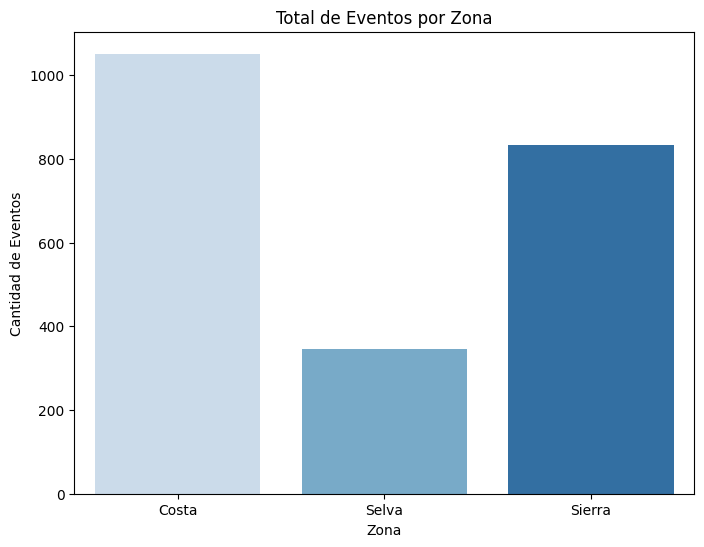

In [19]:
# Total de eventos por Zona
eventos_por_zona = muertes_data.groupby("Zona")["CANT_EVENTOS"].sum().reset_index()
print(eventos_por_zona)


# Gráfico de barras por Zona
plt.figure(figsize=(8, 6))
sns.barplot(data=eventos_por_zona, x="Zona", y="CANT_EVENTOS", palette="Blues")
plt.title("Total de Eventos por Zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Eventos")
plt.show()


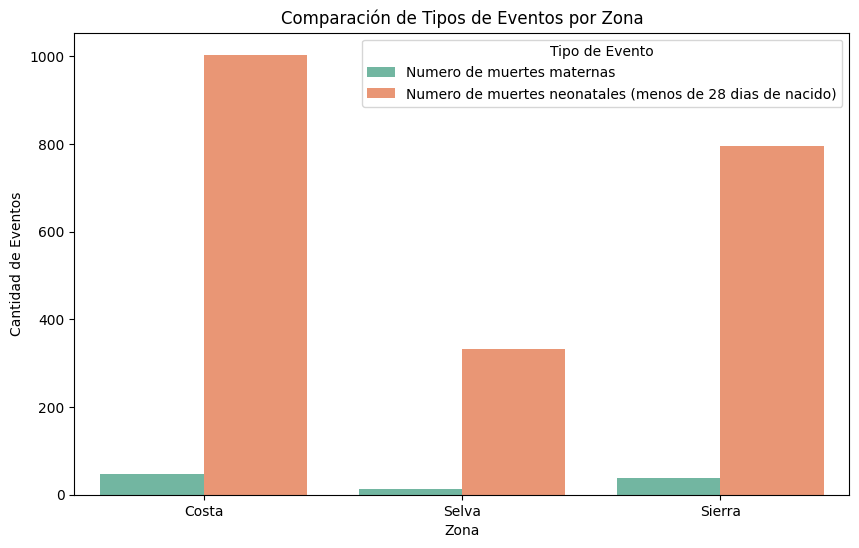

In [27]:
# Comparación por Zona y tipo de evento
comparacion_zona = muertes_data.groupby(["Zona", "EVENTOS"])["CANT_EVENTOS"].sum().reset_index()

# Gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(data=comparacion_zona, x="Zona", y="CANT_EVENTOS", hue="EVENTOS", palette="Set2")
plt.title("Comparación de Tipos de Eventos por Zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Eventos")
plt.legend(title="Tipo de Evento")
plt.show()


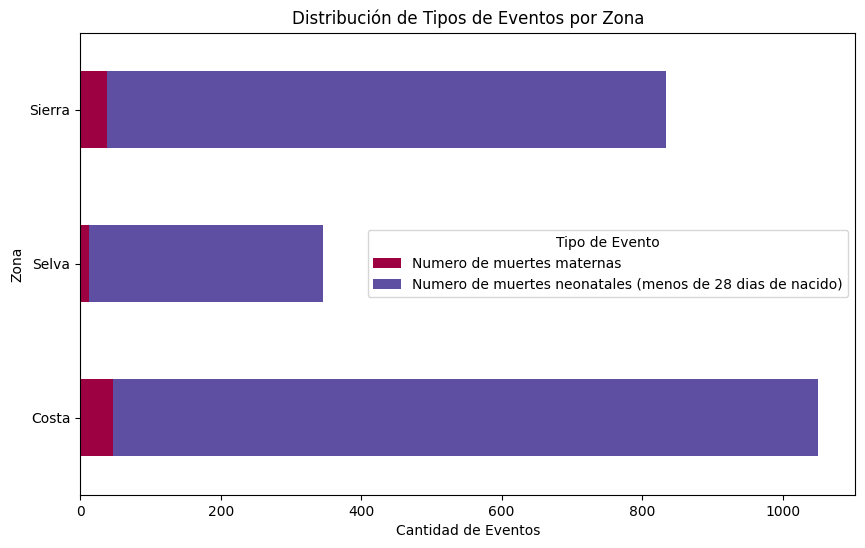

In [21]:
# Comparación por Zona y Evento
relacion_zona_eventos = muertes_data.groupby(["Zona", "EVENTOS"])["CANT_EVENTOS"].sum().unstack().fillna(0)

# Gráfico de barras horizontales
relacion_zona_eventos.plot(kind="barh", stacked=True, figsize=(10, 6), colormap="Spectral")
plt.title("Distribución de Tipos de Eventos por Zona")
plt.xlabel("Cantidad de Eventos")
plt.ylabel("Zona")
plt.legend(title="Tipo de Evento")
plt.show()



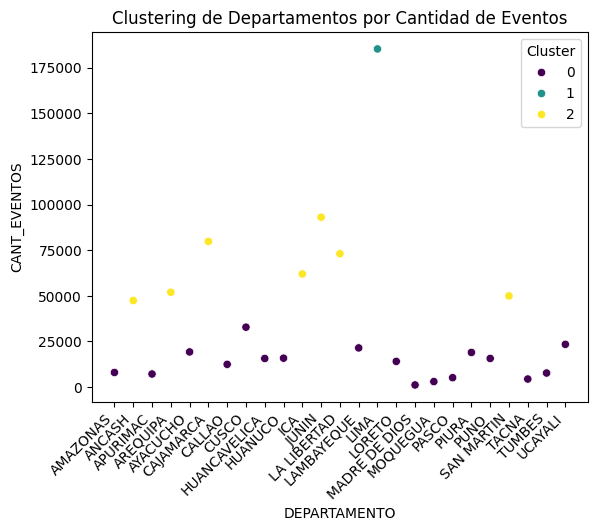

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar características para el agrupamiento
clustering_data = data_salud.groupby("DEPARTAMENTO")[["CANT_EVENTOS"]].sum().reset_index()
clustering_data_scaled = StandardScaler().fit_transform(clustering_data[["CANT_EVENTOS"]])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data["Cluster"] = kmeans.fit_predict(clustering_data_scaled)

# Visualizar resultados
sns.scatterplot(x="DEPARTAMENTO", y="CANT_EVENTOS", hue="Cluster", data=clustering_data, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Clustering de Departamentos por Cantidad de Eventos")
plt.show()


 Predicción de Cantidad de Eventos
Objetivo: Predecir la cantidad de eventos futuros basándose en datos históricos.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparar datos
features = data_salud[["MES", "UBIGEO"]]  # Selección de características
target = data_salud["CANT_EVENTOS"]       # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluación
predictions = model.predict(X_test)
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, predictions):.2f}")


Error Cuadrático Medio: 146.42


Clasificación de Categorías
Objetivo: Clasificar eventos o sectores basándose en características específicas.